# WordCloud - Experimento

O WordCloud é uma representação visual de um texto, onde palavras-chave são apresentadas com as suas devidas importâncias nesse texto. O Componente utiliza a biblioteca (wordcloud)[https://pypi.org/project/wordcloud/].

### **Em caso de dúvidas, consulte os [tutoriais da PlatIAgro](https://platiagro.github.io/tutorials/).**

## Declaração de parâmetros e hiperparâmetros

Declare parâmetros com o botão  na barra de ferramentas.<br>
A variável `dataset` possui o caminho para leitura do arquivos importados na tarefa de "Upload de dados".<br>
Você também pode importar arquivos com o botão  na barra de ferramentas.

Para esse componente, a base de dados deve estar nos seguinte formatos possíveis:

1. Arquivo CSV onde existe uma coluna de dados chamada "text" contendo os textos para a geração das imagens wordcloud.
2. Arquivo TXT contendo o texto para ser gerado a imagem wordcloud.

In [37]:
dataset = "/tmp/data/page7.txt" #@param {type:"string"}
background_color = "white" #@param {type: "string", label:"Cor do fundo da imagem", description: "Cor utilizada para o fundo da imagem wordcloud. As cores das palavras serão escolhidas automaticamente se baseando nessa cor de fundo"}
max_words = 200 #@param {type: "number", label:"O número máximo de palavras", description: "Número máximo de palavras na imagem wordcloud gerada."}
stopwords = "" #@param {type: "string", label: "Palavras para serem excluídas da geração do wordcloud.", description: "Palavras para serem exluídas do wordcloud. Este parâmetro deve ser passado como um texto, onde as palavras devem ser separadas por vírgulas."} 
max_font_size = None #@param {type: "number", label:"Tamanho máximo da fonte para a maior palavra", description:"Tamanho da fonte para a maior palavra do wordcloud. Caso não seja passado, a altura da imagem será utilizada."}
width = 1920 #@param {type: "number", label:"Largura da imagem wordcloud", description: "Largura da imagem a ser gerada."}
height = 1080 #@param {type: "number", label:"Altura da imagem wordcloud", description: "Altura da imagem a ser gerada."}

In [38]:
# wordcloud parameters
wordcloud_parameters = {
    'background_color': background_color,
    'max_words': max_words,
    'stopwords': stopwords,
    'max_font_size': max_font_size,
    'width': width,
    'height': height
}

try:
    stopwords = stopwords.split(",")
except:
    stopwords = []

## Leitura do conjunto de dados

O exemplo abaixo faz a leitura de dados tabulares (ex: .csv).<br>
Modifique o código de acordo com o tipo de dado que desejar ler.

In [39]:
import pandas as pd

data_type = dataset.split(".")[-1]

if data_type == "csv":
    data = pd.read_csv(dataset)

elif data_type == "txt":
    _file = open(dataset, "r")
    data = _file.read()
    
else:
    print("Wrong data type")

data

'8\nCant-Dietrich-Eick-Moede\nWe say a Galois tree R in Sp(n) has type t if the groups in R are all defned by elements in Ωn,t, cf.\nCorollary 5.3. Te next lemma gives a necessary condition for e to be a ramifcation level; the example\nbelow illustrates that this condition is not sufcient.\nLemma 5.4. Let R be a Galois tree in Sp(n) of Galois order h and type t. If R has ramifcation level e, then\ne mod h ∈ {2(j − i) mod h : i ∈ It, j ∈ {1, . . . , ℓ}},\nwhere It = {i ∈ {1, . . . , ℓ} : t ≡ k(n − 2i) mod d}.\nProof. Let G1 and G2 be distinct groups in R with the same immediate ancestor in R; suppose G1 and G2\nhave depth e + 1 in Sp(n). Teorem 4.1 and Corollary 5.3 show that we can defne each Gi = Cn,e+1(xi)\nfor some xi ∈ Ωn,t. Since Cn,e(x1) ∼= Cn,e(x2) is the isomorphism type of the parent of G1 and G2,\nProposition 5.2 shows that there is v ∈ ker(χ) and m ∈ {0, . . . , k−1} with (v, σm)(x1) ≡ x2 mod Γn+e,\nthat is, (v, σm)(x1) = x2 + y for some y ∈ Γn+e. It follows from the defniti

## Conteúdo da tarefa

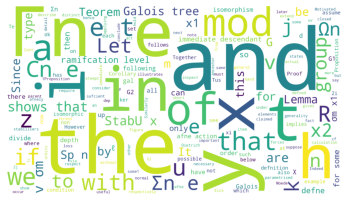

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color = background_color,
              max_words = max_words,
              stopwords = stopwords,
              width = width,
              height = height,
              max_font_size = max_font_size)

images = []

if data_type == "csv":
    for text in data["text"]:
        wc.generate(text)
        images.append(wc.to_image())
    
    fig, axies = plt.subplots(1, len(images), figsize=(12, 12))
    for idx, img in enumerate(images):
        axies[idx].imshow(img)
        axies[idx].axis('Off')
        
        
elif data_type == "txt":
    wc.generate(data)
    images.append(wc.to_image())
    plt.imshow(wc)
    plt.axis('Off')
    

## Salva resultados da tarefa

A plataforma guarda o conteúdo de `/tmp/data/` para as tarefas subsequentes.<br>
Use essa pasta para salvar modelos, metadados e outros resultados.

In [36]:
from joblib import dump

artifacts = {
    "wordcloud_parameters": wordcloud_parameters
}

for idx, img in enumerate(images):
    img.save(f"/tmp/data/wordcloud_img_{idx}.png")

dump(artifacts, "/tmp/data/word_cloud.joblib")

['/tmp/data/word_cloud.joblib']